In [2]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 
import math

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


In [9]:
def IC_bounds():
    x31_x75 = np.array([dom_x_positions[31][1],dom_x_positions[75][1]])
    y31_y75 = np.array([dom_y_positions[31][1],dom_y_positions[75][1]])
    
    x75_x78 = np.array([dom_x_positions[75][1],dom_x_positions[78][1]])
    y75_y78 = np.array([dom_y_positions[75][1],dom_y_positions[78][1]])
    
    x78_x72 = np.array([dom_x_positions[78][1],dom_x_positions[72][1]])
    y78_y72 = np.array([dom_y_positions[78][1],dom_y_positions[72][1]])
    
    x72_x74 = np.array([dom_x_positions[72][1],dom_x_positions[74][1]])
    y72_y74 = np.array([dom_y_positions[72][1],dom_y_positions[74][1]])
    
    x74_x50 = np.array([dom_x_positions[74][1],dom_x_positions[50][1]])
    y74_y50 = np.array([dom_y_positions[74][1],dom_y_positions[50][1]])
    
    x50_x6 = np.array([dom_x_positions[50][1],dom_x_positions[6][1]])
    y50_y6 = np.array([dom_y_positions[50][1],dom_y_positions[6][1]])
    
    x6_x1 = np.array([dom_x_positions[6][1],dom_x_positions[1][1]])
    y6_y1 = np.array([dom_y_positions[6][1],dom_y_positions[1][1]])
    
    x1_x31 = np.array([dom_x_positions[1][1],dom_x_positions[31][1]])
    y1_y31 = np.array([dom_y_positions[1][1],dom_y_positions[31][1]])
    
    plt.plot(x31_x75, y31_y75, color='red')
    plt.plot(x75_x78, y75_y78, color='red')
    plt.plot(x78_x72, y78_y72, color='red')
    plt.plot(x72_x74, y72_y74, color='red')
    plt.plot(x74_x50, y74_y50, color='red')
    plt.plot(x50_x6, y50_y6, color='red')
    plt.plot(x6_x1, y6_y1, color='red')
    plt.plot(x1_x31, y1_y31, color='red')
   

In [10]:
def gen2_bounds():
    x1= [-800,358.4797991866982]
    y1 = [-1666.57, -698.8318630285269]
    x2 = [358.4797991866982,928.0894367684451]
    y2 = [-698.8318630285269,722.9496732975679]
    x3 = [928.0894367684451,579.91346]
    y3 = [722.9496732975679,1654.65477]
    plt.plot(x1, y1, color='g')
    plt.plot(x2, y2, color='g')
    plt.plot(x3, y3, color='g')

In [8]:
""" x: choosen x cooordinates
     y: choosen y coordinates
     z: choosen z coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_3d_no_icetop(x, y, z, random_gen):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_zlabel('Z-axis (m)')
    ax.set_title("3D Gen2 Randomized Geometry without IceTop \n" + random_gen) 
    ax.dist = 11
    IC_bounds()
    ax.scatter3D(x[:,0:61], y[:,0:61], z[:,0:61], s =7, c='green', depthshade=True)
    return fig
    

In [579]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_icetop(x, y, random_gen):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    #num = str(num)
    ax.set_title("IceCube-Gen2 Pared Down " +random_gen+ " Geometry")
    plt.gca().set_aspect("equal")
    IC_bounds()
    gen2_points = ax.scatter(x, y, s =7, c='blue')
    gen2_points.set_label('Gen2 Strings')
    ax.legend(loc='lower right',fontsize = 9)
    
    return fig
    

In [153]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_icetop_big(x, y,x1, y1, random_gen):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel("X-axis (m)")
    ax.set_ylabel("Y-axis (m)")
    ax.set_title("IceCube-Gen2 " +random_gen +" Geometry") 
    #circ = plt.Circle( (0, 0 ),525 ,fill = False )
    #ax.add_artist(circ)

    plt.gca().set_aspect("equal")
    IC_bounds()
    gen2_bounds()
    gen2_points = ax.scatter(x, y, s =9, c="c")
    
    #annotations=[ '{}'.format(x) for x in range(0,100)]
    
    #for i, label in enumerate(annotations):
        #plt.annotate(label, (x[i, 1], y[i,1]),fontsize=8)
    

    ic_points = ax.scatter(x1, y1, s= 9, c="blue")
    plt.legend((gen2_points, ic_points),
           ('Gen2 Strings', 'IceCube Strings'),loc='lower right',fontsize=9)
    return fig
    

# Uniform Geometry

In [2]:
#creates random x,y positions for each string
def uniform_random_string(low, high, coordinate_array, split,a):
    index = 0
    rand_uniform_positions = []
    random.seed(a)
    for string_num in coordinate_array:
        string_num = random.uniform(low, high)
        rand_uniform_positions = np.insert(rand_uniform_positions,index, string_num)
        index = index + 1
        
    rand_uniform_positions = np.repeat(rand_uniform_positions, 67)
    #print(rand_uniform_positions)
    #print(len(rand_uniform_positions))
    rand_dom_list = [rand_uniform_positions[x:x+split] for x in range(0, len(rand_uniform_positions), split)]
    rand_uni_positions = np.asarray(rand_dom_list)
    return rand_uni_positions

In [6]:
#creates random x,y positions for each string upscaled
def uniform_random_string_big(low, high, n, split,a):
    index = 0
    rand_uniform_positions = []
    random.seed(a)
    for string_num in range(0,n):
        string_num = random.uniform(low, high)
        rand_uniform_positions = np.insert(rand_uniform_positions,index, string_num)
        index = index + 1
        
    rand_uniform_positions = np.repeat(rand_uniform_positions, 67)
    #print(rand_uniform_positions)
    #print(len(rand_uniform_positions))
    rand_dom_list = [rand_uniform_positions[x:x+split] for x in range(0, len(rand_uniform_positions), split)]
    rand_uni_positions = np.asarray(rand_dom_list)
    return rand_uni_positions

In [582]:
#positions for pared down version
rand_x_positions = uniform_random_string(-600., 550, gen2_dom_x_positions, 67,99)
rand_y_positions = uniform_random_string(-600., 550, gen2_dom_y_positions, 67,14)

In [73]:
#positions for gen2 sized version
xx = uniform_random_string_big(-1500,600,141,67,99)
yy = uniform_random_string_big(-1200,1500,141,67,14)
print(len(xx))

141


[-570.9  -347.88] [-125.14  451.52]


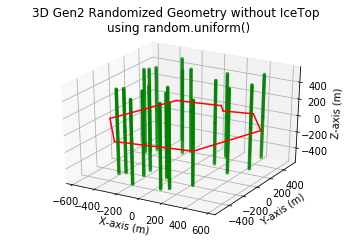

In [37]:
fig1=plot_3d_no_icetop(rand_x_positions, rand_y_positions, gen2_dom_z_positions, "using random.uniform()")

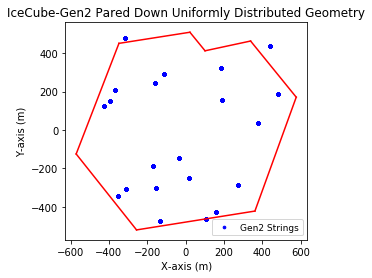

In [583]:
fig2 = plot_2d_icetop(rand_x_positions,rand_y_positions,"Uniformly Distributed") 

In [584]:
fig2.savefig('aas_plots/final_uniform_2d_pared.png')

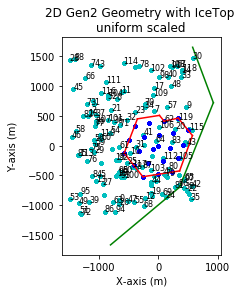

In [103]:
fig3= plot_2d_icetop_big(xx,yy,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "uniform scaled")

In [97]:
fig3.savefig('aas_plots/uniform_2d_gen2.png')

In [105]:
#exclude overlapping strings
uniform_x = np.concatenate((xx[0:4], xx[5:8], xx[9:16], xx[17:20], xx[21:22],xx[23:25],xx[26:31],xx[32:35],
                            xx[36:38],xx[39:41],xx[44:62],xx[63:64],xx[66:79],xx[81:83],xx[84:87],xx[88:106],
                            xx[107:112],xx[113:117],xx[118:]))
print(uniform_x)
print(len(uniform_x))
uniform_y = np.concatenate((yy[0:4], yy[5:8], yy[9:16], yy[17:20], yy[21:22],yy[23:25],yy[26:31],yy[32:35],
                            yy[36:38],yy[39:41],yy[44:62],yy[63:64],yy[66:79],yy[81:83],yy[84:87],yy[88:106],
                            yy[107:112],yy[113:117],yy[118:]))
print(uniform_y)
print(len(uniform_y))

[[ -651.64604262  -651.64604262  -651.64604262 ...  -651.64604262
   -651.64604262  -651.64604262]
 [-1079.84156639 -1079.84156639 -1079.84156639 ... -1079.84156639
  -1079.84156639 -1079.84156639]
 [-1124.51512677 -1124.51512677 -1124.51512677 ... -1124.51512677
  -1124.51512677 -1124.51512677]
 ...
 [  -41.89127221   -41.89127221   -41.89127221 ...   -41.89127221
    -41.89127221   -41.89127221]
 [  525.7597356    525.7597356    525.7597356  ...   525.7597356
    525.7597356    525.7597356 ]
 [-1094.11840832 -1094.11840832 -1094.11840832 ... -1094.11840832
  -1094.11840832 -1094.11840832]]
119
[[-911.56294821 -911.56294821 -911.56294821 ... -911.56294821
  -911.56294821 -911.56294821]
 [ 696.98091476  696.98091476  696.98091476 ...  696.98091476
   696.98091476  696.98091476]
 [ 560.51345485  560.51345485  560.51345485 ...  560.51345485
   560.51345485  560.51345485]
 ...
 [-599.75272087 -599.75272087 -599.75272087 ... -599.75272087
  -599.75272087 -599.75272087]
 [-804.4890934  -804

In [121]:
#exclude overlapping strings part 2
uni_x = np.concatenate((uniform_x[0:8], uniform_x[9:84], uniform_x[85:86], uniform_x[87:97],
                        uniform_x[98:100],uniform_x[101:108],uniform_x[109:110],
                        uniform_x[111:113],uniform_x[114:117],uniform_x[118:]))
print(uni_x)
print(len(uni_x))
uni_y = np.concatenate((uniform_y[0:8], uniform_y[9:84], uniform_y[85:86], uniform_y[87:97],
                        uniform_y[98:100],uniform_y[101:108],uniform_y[109:110],
                        uniform_y[111:113],uniform_y[114:117],uniform_y[118:]))
print(uni_y)
print(len(uni_y))

[[ -651.64604262  -651.64604262  -651.64604262 ...  -651.64604262
   -651.64604262  -651.64604262]
 [-1079.84156639 -1079.84156639 -1079.84156639 ... -1079.84156639
  -1079.84156639 -1079.84156639]
 [-1124.51512677 -1124.51512677 -1124.51512677 ... -1124.51512677
  -1124.51512677 -1124.51512677]
 ...
 [  -99.17125072   -99.17125072   -99.17125072 ...   -99.17125072
    -99.17125072   -99.17125072]
 [  -41.89127221   -41.89127221   -41.89127221 ...   -41.89127221
    -41.89127221   -41.89127221]
 [-1094.11840832 -1094.11840832 -1094.11840832 ... -1094.11840832
  -1094.11840832 -1094.11840832]]
110
[[-911.56294821 -911.56294821 -911.56294821 ... -911.56294821
  -911.56294821 -911.56294821]
 [ 696.98091476  696.98091476  696.98091476 ...  696.98091476
   696.98091476  696.98091476]
 [ 560.51345485  560.51345485  560.51345485 ...  560.51345485
   560.51345485  560.51345485]
 ...
 [-852.05178782 -852.05178782 -852.05178782 ... -852.05178782
  -852.05178782 -852.05178782]
 [-599.75272087 -59

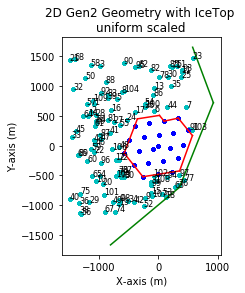

In [124]:
fig4= plot_2d_icetop_big(uni_x,uni_y,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "uniform scaled")

In [143]:
x_replace=uniform_random_string_big(-1500,600,13,67,99)
y_replace = uniform_random_string_big(-1200,1500,13,67,14)
print(x_replace[12])
print(y_replace[12])

[-212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021 -212.24627021 -212.24627021 -212.24627021
 -212.24627021 -212.24627021]
[-880.32116136 -880.32116136 -880.32116136 -880

In [144]:
x_final = np.concatenate((uni_x[:],x_replace[0:4], x_replace[5:8],x_replace[9:10],x_replace[11:]))
y_final = np.concatenate((uni_y[:],y_replace[0:4], y_replace[5:8],y_replace[9:10],y_replace[11:]))
print(len(x_final))
print(len(y_final))

120
120


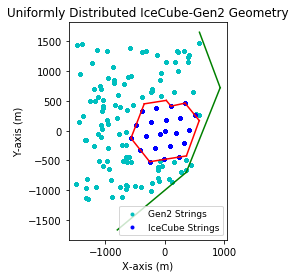

In [188]:
fig5= plot_2d_icetop_big(uni_x,uni_y,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Uniformly")

In [189]:
fig5.savefig('aas_plots/final_uniform_2d_gen2')

# Gaussian Geometry

In [5]:
""" coordinate_array: DOM positions array to be transformed to randomly generated positions by string
    split: the second dimension in a 2d array (x, split)
"""
#creates random x,y positions for each string
def gauss_random_string(coordinate_array, split,a):
    index = 0
    rand_gauss_positions = []
    random.seed(a)
    for string_num in coordinate_array:
        string_num = random.gauss(np.average(coordinate_array), np.std(coordinate_array))
        rand_gauss_positions = np.insert(rand_gauss_positions,index, string_num)
        index = index + 1
        
    rand_gauss_positions = np.repeat(rand_gauss_positions, 67)
    print('mean')
    print(np.average(coordinate_array))
    print('std')
    print(np.std(coordinate_array))
    random_list = [rand_gauss_positions[x:x+split] for x in range(0, len(rand_gauss_positions), split)]
    rand_gau_positions = np.asarray(random_list)
    return rand_gau_positions

In [6]:
rand_x_gauss = gauss_random_string(gen2_dom_x_positions, 67,3)
rand_y_gauss = gauss_random_string(gen2_dom_y_positions, 67,96)

#for i in range(0,100):
#    rand_y_gauss = gauss_random_string(gen2_dom_y_positions, 67,i)
#    plot_2d_icetop(rand_x_gauss,rand_y_gauss,'Gaussian',i)


mean
-27.61009239516702
std
299.1555215255026
mean
-15.358514570007081
std
287.62244559877684


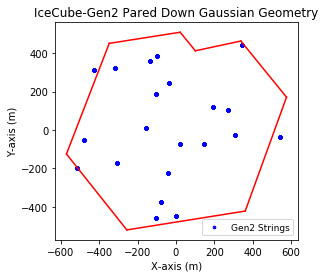

In [588]:
fig6 = plot_2d_icetop(rand_x_gauss,rand_y_gauss, 'Gaussian')

In [589]:
fig6.savefig('aas_plots/final_gaussian_2d_pared.png')

In [303]:
#creates random x,y positions for each string Upscaled
def gauss_random_string_big(n, coordinate_array, split,a):
    index = 0
    rand_gauss_positions = []
    random.seed(a)
    for string_num in range(0,n):
        string_num = random.gauss(np.average(coordinate_array), np.std(coordinate_array))
        rand_gauss_positions = np.insert(rand_gauss_positions,index, string_num)
        index = index + 1
        
    rand_gauss_positions = np.repeat(rand_gauss_positions, 67)    
    random_list = [rand_gauss_positions[x:x+split] for x in range(0, len(rand_gauss_positions), split)]
    rand_gau_positions = np.asarray(random_list)
    return rand_gau_positions


In [304]:
gauss_x= gauss_random_string_big(141,gen2_dom_x_positions, 67,3)
gauss_y= gauss_random_string_big(141,gen2_dom_x_positions, 67,96)

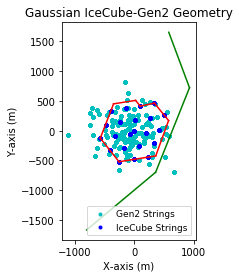

In [308]:
fig7 = plot_2d_icetop_big(gauss_x, gauss_y,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Gaussian")

In [309]:
fig7.savefig('aas_plots/final_gauss_2d_gen2.png')

# Triangular Geometry

In [310]:
#creates random x,y positions for each string
def triangular_random_string(low, high, coordinate_array, split,a):
    index = 0
    rand_triangular_positions = []
    random.seed(a)
    for string_num in coordinate_array:
        string_num = random.triangular(low, high)
        rand_triangular_positions = np.insert(rand_triangular_positions,index, string_num)
        index = index + 1
        
    rand_triangular_positions = np.repeat(rand_triangular_positions, 67)    
    random_list = [rand_triangular_positions[x:x+split] for x in range(0, len(rand_triangular_positions), split)]
    rand_tri_positions = np.asarray(random_list)
    return rand_tri_positions

In [380]:
rand_x_tri = triangular_random_string(-600., 550, gen2_dom_x_positions, 67,7)
rand_y_tri = triangular_random_string(-600., 550, gen2_dom_y_positions, 67,88)
#for i in range(0,100):
#    rand_y_tri = triangular_random_string(-600., 550, gen2_dom_y_positions, 67,i)
#    plot_2d_icetop(rand_x_tri,rand_y_tri,'Triangular',i)


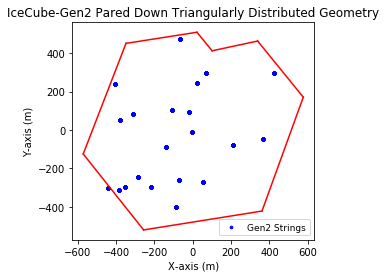

In [585]:
fig8 = plot_2d_icetop(rand_x_tri,rand_y_tri,'Triangularly Distributed')

In [586]:
fig8.savefig('aas_plots/final_triangular_2d_pared.png')

In [388]:
#creates random x,y positions for each string scaled 
def triangular_random_string_big(low, high, n, split,a):
    index = 0
    rand_triangular_positions = []
    random.seed(a)
    for string_num in range(0,n):
        string_num = random.triangular(low, high)
        rand_triangular_positions = np.insert(rand_triangular_positions,index, string_num)
        index = index + 1
        
    rand_triangular_positions = np.repeat(rand_triangular_positions, 67)    
    random_list = [rand_triangular_positions[x:x+split] for x in range(0, len(rand_triangular_positions), split)]
    rand_tri_positions = np.asarray(random_list)
    return rand_tri_positions

In [389]:
tri_x = triangular_random_string_big(-1500,1500,141,67,7)
tri_y = triangular_random_string_big(-1500,1500,141,67,88)

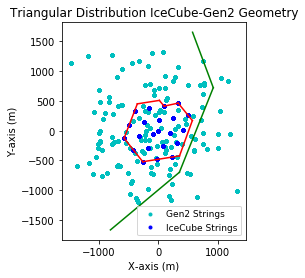

In [391]:
fig9 = plot_2d_icetop_big(tri_x, tri_y,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Triangular Distribution")

In [392]:
fig9.savefig('aas_plots/final_triangular_2d_gen2.png')

# Fibonacci Geometry

In [2]:
"""  start_n: initial value of n
     stop n: end value of n
     s: scale factor to define string spacing
"""

def sunflower_coords(start_n, stop_n, s):
    #golden ratio
    g = (1 + math.sqrt(5))/2
    
    r_positions = []
    for n in range(start_n,stop_n):
        r = s*((n)**(1/2))
        r_positions = np.append(r_positions, r)
    #print('this is r_positions')
    #print(r_positions)
    
    #convert (r,theta) to (x, y)
    x_points = []
    y_points = []
    t = 0
    t_add = ((2*math.pi)/(g**2))
    #print("initial t")
    #print(t)
    for r in r_positions:
        x = r*(math.cos(t))
        y = r*(math.sin(t))
        t = t + t_add
        #print(t)
        x_points = np.append(x_points, x)
        y_points = np.append(y_points, y)
        
    split_size = 67
    x_points = np.repeat(x_points, 67)
    y_points = np.repeat(y_points, 67)
    xx_1 = [x_points[i:i+split_size] for i in range(0, len(x_points), split_size)]
    yy_1 = [y_points[i:i+split_size] for i in range(0, len(y_points), split_size)]
    xx_2 = np.asarray(xx_1)
    yy_2 = np.asarray(yy_1)
    #print("x points")
    #print(x_points)
    #print('y points')
    #print(y_points)
    
    return xx_2, yy_2

In [97]:
x , y = sunflower_coords(21,141,120)
print(x)

[[  549.90908339   549.90908339   549.90908339 ...   549.90908339
    549.90908339   549.90908339]
 [ -415.02799279  -415.02799279  -415.02799279 ...  -415.02799279
   -415.02799279  -415.02799279]
 [   50.31348559    50.31348559    50.31348559 ...    50.31348559
     50.31348559    50.31348559]
 ...
 [ -518.74609754  -518.74609754  -518.74609754 ...  -518.74609754
   -518.74609754  -518.74609754]
 [ 1272.50125038  1272.50125038  1272.50125038 ...  1272.50125038
   1272.50125038  1272.50125038]
 [-1360.85231582 -1360.85231582 -1360.85231582 ... -1360.85231582
  -1360.85231582 -1360.85231582]]


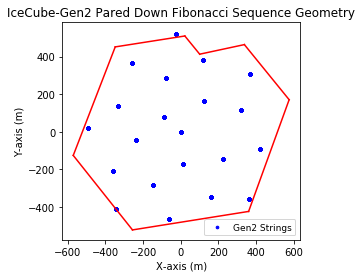

In [591]:
fig10 = plot_2d_icetop(x,y,'Fibonacci Sequence')

In [592]:
fig10.savefig('aas_plots/final_fibonacci_2d_pared.png')

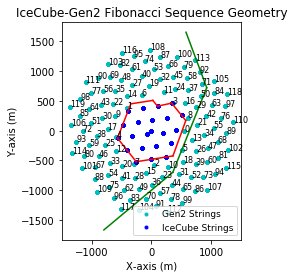

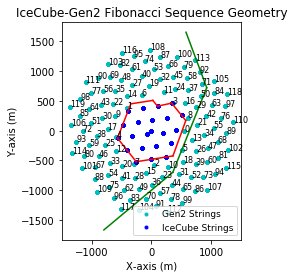

In [98]:
plot_2d_icetop_big(x,y,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Fibonacci Sequence")

In [99]:
#exclude out of bound strings
fib_x = np.concatenate((x[:1], x[2:3], x[5:7], x[8:13], x[14:18],x[19:21],x[22:26],x[27:31],
                        x[32:34],x[35:39],x[40:42],x[43:44],x[45:47],x[48:52],x[53:55],x[56:57],
                        x[58:60],x[61:63],x[64:65],x[66:68],x[69:70],x[71:73],x[74:76],x[77:78],x[79:81],
                        x[82:84],x[85:86],x[87:89],x[90:91],x[92:94],x[95:97],x[98:99],x[100:102],x[103:104],
                        x[106:107],x[108:110],x[111:112],x[113:115],x[116:118],x[119:]))

fib_y = np.concatenate((y[0:1], y[2:3], y[5:7], y[8:13], y[14:18],y[19:21],y[22:26],y[27:31],
                        y[32:34],y[35:39],y[40:42],y[43:44],y[45:47],y[48:52],y[53:55],y[56:57],
                        y[58:60],y[61:63],y[64:65],y[66:68],y[69:70],y[71:73],y[74:76],y[77:78],y[79:81],
                        y[82:84],y[85:86],y[87:89],y[90:91],y[92:94],y[95:97],y[98:99],y[100:102],y[103:104],
                        y[106:107],y[108:110],y[111:112],y[113:115],y[116:118],y[119:]))
print(len(fib_x))

79


In [100]:
fib_add_x, fib_add_y = sunflower_coords(141,182,120)
print(fib_add_x)
fib_tot_x = np.concatenate((fib_x[:],fib_add_x[:]))
fib_tot_y = np.concatenate((fib_y[:],fib_add_y[:]))

[[ 1424.92105044  1424.92105044  1424.92105044 ...  1424.92105044
   1424.92105044  1424.92105044]
 [-1054.41171321 -1054.41171321 -1054.41171321 ... -1054.41171321
  -1054.41171321 -1054.41171321]
 [  125.45515342   125.45515342   125.45515342 ...   125.45515342
    125.45515342   125.45515342]
 ...
 [-1598.63947032 -1598.63947032 -1598.63947032 ... -1598.63947032
  -1598.63947032 -1598.63947032]
 [ 1282.4359631   1282.4359631   1282.4359631  ...  1282.4359631
   1282.4359631   1282.4359631 ]
 [ -288.95734055  -288.95734055  -288.95734055 ...  -288.95734055
   -288.95734055  -288.95734055]]


In [101]:
#exclude out of bound strings round 2
fib_reduced_x = np.concatenate((fib_tot_x[0:79], fib_tot_x[80:81], fib_tot_x[83:84], fib_tot_x[85:87], 
                                fib_tot_x[88:89],fib_tot_x[90:92],fib_tot_x[93:94],fib_tot_x[96:97],
                                fib_tot_x[98:100],fib_tot_x[101:102],fib_tot_x[104:105],fib_tot_x[106:107],
                                fib_tot_x[109:110],fib_tot_x[111:113],fib_tot_x[114:115],fib_tot_x[117:118],
                                fib_tot_x[119:]))

fib_reduced_y = np.concatenate((fib_tot_y[0:79], fib_tot_y[80:81], fib_tot_y[83:84], fib_tot_y[85:87], 
                                fib_tot_y[88:89],fib_tot_y[90:92],fib_tot_y[93:94],fib_tot_y[96:97],
                                fib_tot_y[98:100],fib_tot_y[101:102],fib_tot_y[104:105],fib_tot_y[106:107],
                                fib_tot_y[109:110],fib_tot_y[111:113],fib_tot_y[114:115],fib_tot_y[117:118],
                                fib_tot_y[119:]))
print(len(fib_reduced_y))

99


In [102]:
fib_add_x_2, fib_add_y_2 = sunflower_coords(182,203,120)
print(len(fib_add_x_2))
fib_tot_x_2 = np.concatenate((fib_reduced_x[:],fib_add_x_2[:]))
fib_tot_y_2= np.concatenate((fib_reduced_y[:],fib_add_y_2[:]))

21


In [103]:
#exclude out of bound strings round 3
fib_reduced_x2 = np.concatenate((fib_tot_x_2[0:99], fib_tot_x_2[100:101], fib_tot_x_2[103:104], 
                                 fib_tot_x_2[105:107],fib_tot_x_2[108:109],fib_tot_x_2[110:112],
                                 fib_tot_x_2[113:114],fib_tot_x_2[116:117],fib_tot_x_2[118:]))

fib_reduced_y2 = np.concatenate((fib_tot_y_2[0:99], fib_tot_y_2[100:101], fib_tot_y_2[103:104], 
                                 fib_tot_y_2[105:107],fib_tot_y_2[108:109],fib_tot_y_2[110:112],
                                 fib_tot_y_2[113:114],fib_tot_y_2[116:117],fib_tot_y_2[118:]))
print(len(fib_reduced_y2))

110


In [104]:
fib_add_x_3, fib_add_y_3 = sunflower_coords(203,213,120)
print(len(fib_add_x_3))
fib_tot_x_3 = np.concatenate((fib_reduced_x2[:],fib_add_x_3[:]))
fib_tot_y_3= np.concatenate((fib_reduced_y2[:],fib_add_y_3[:]))

10


In [105]:
#exclude out of bound strings round 4
fib_reduced_x3 = np.concatenate((fib_tot_x_3[0:110], fib_tot_x_3[111:112], fib_tot_x_3[114:115], 
                                 fib_tot_x_3[116:118],fib_tot_x_3[119:]))

fib_reduced_y3 = np.concatenate((fib_tot_y_3[0:110], fib_tot_y_3[111:112], fib_tot_y_3[114:115], 
                                 fib_tot_y_3[116:118],fib_tot_y_3[119:]))
print(len(fib_reduced_y3))

115


In [106]:
fib_add_x_4, fib_add_y_4 = sunflower_coords(213,218,120)
print(len(fib_add_x_4))
fib_tot_x_4 = np.concatenate((fib_reduced_x3[:],fib_add_x_4[:]))
fib_tot_y_4= np.concatenate((fib_reduced_y3[:],fib_add_y_4[:]))

5


In [107]:
#exclude out of bound strings round 5
fib_reduced_x4 = np.concatenate((fib_tot_x_4[0:115], fib_tot_x_4[116:117], fib_tot_x_3[119:]))

fib_reduced_y4 = np.concatenate((fib_tot_y_4[0:115], fib_tot_y_4[116:117], fib_tot_y_3[119:]))
print(len(fib_reduced_y4))

117


In [108]:
fib_add_x_5, fib_add_y_5 = sunflower_coords(218,221,120)
print(len(fib_add_x_5))
fib_tot_x_5 = np.concatenate((fib_reduced_x4[:],fib_add_x_5[:]))
fib_tot_y_5= np.concatenate((fib_reduced_y4[:],fib_add_y_5[:]))
print(len(fib_tot_x_5))

3
120


In [113]:
#exclude out of bound strings round 5
fib_reduced_x5 = np.concatenate((fib_tot_x_4[0:117], fib_tot_x_4[118:119], fib_tot_x_3[120:]))

fib_reduced_y5 = np.concatenate((fib_tot_y_4[0:117], fib_tot_y_4[118:119], fib_tot_y_3[120:]))
print(len(fib_reduced_y5))

118


In [114]:
fib_add_x_6, fib_add_y_6 = sunflower_coords(221,223,120)
print(len(fib_add_x_6))
fib_tot_x_6 = np.concatenate((fib_reduced_x5[:],fib_add_x_6[:]))
fib_tot_y_6= np.concatenate((fib_reduced_y5[:],fib_add_y_6[:]))

2


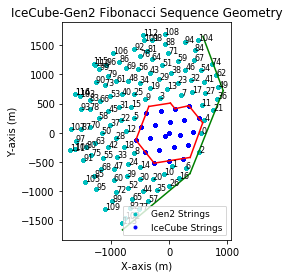

In [121]:
fig11=plot_2d_icetop_big(fib_reduced_x4,fib_reduced_y4,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Fibonacci Sequence")

In [498]:
fig11.savefig('aas_plots/final_fibonacci_2d_gen2.png')

# Halton Geometry

In [125]:
#outputs halton sequence
#from tupui/halton.py on github


def primes_from_2_to(n):
    """Prime number from 2 to n.
    From `StackOverflow <https://stackoverflow.com/questions/2068372>`_.
    :param int n: sup bound with ``n >= 6``.
    :return: primes in 2 <= p < n.
    :rtype: list
    """
    sieve = np.ones(n // 3 + (n % 6 == 2), dtype=np.bool)
    for i in range(1, int(n ** 0.5) // 3 + 1):
        if sieve[i]:
            k = 3 * i + 1 | 1
            sieve[k * k // 3::2 * k] = False
            sieve[k * (k - 2 * (i & 1) + 4) // 3::2 * k] = False
    return np.r_[2, 3, ((3 * np.nonzero(sieve)[0][1:] + 1) | 1)]


def van_der_corput(n_sample, base=2):
    """Van der Corput sequence.
    :param int n_sample: number of element of the sequence.
    :param int base: base of the sequence.
    :return: sequence of Van der Corput.
    :rtype: list (n_samples,)
    """
    sequence = []
    for i in range(n_sample):
        n_th_number, denom = 0., 1.
        while i > 0:
            i, remainder = divmod(i, base)
            denom *= base
            n_th_number += remainder / denom
        sequence.append(n_th_number)

    return sequence


def halton(dim, n_sample):
    """Halton sequence.
    :param int dim: dimension
    :param int n_sample: number of samples.
    :return: sequence of Halton.
    :rtype: array_like (n_samples, n_features)
    """
    big_number = 10
    while 'Not enought primes':
        base = primes_from_2_to(big_number)[:dim]
        if len(base) == dim:
            break
        big_number += 1000

    # Generate a sample using a Van der Corput sequence per dimension.
    sample = [van_der_corput(n_sample + 1, dim) for dim in base]
    sample = np.stack(sample, axis=-1)[1:]
    
    return sample

print(halton(2, 21))

[[0.5        0.33333333]
 [0.25       0.66666667]
 [0.75       0.11111111]
 [0.125      0.44444444]
 [0.625      0.77777778]
 [0.375      0.22222222]
 [0.875      0.55555556]
 [0.0625     0.88888889]
 [0.5625     0.03703704]
 [0.3125     0.37037037]
 [0.8125     0.7037037 ]
 [0.1875     0.14814815]
 [0.6875     0.48148148]
 [0.4375     0.81481481]
 [0.9375     0.25925926]
 [0.03125    0.59259259]
 [0.53125    0.92592593]
 [0.28125    0.07407407]
 [0.78125    0.40740741]
 [0.15625    0.74074074]
 [0.65625    0.18518519]]


In [126]:
def point_transform(coordinate_matrix, M):
    points = []
    for point in coordinate_matrix:
        transform_point = np.dot(M, point)
        points = np.append(points, transform_point)
    return points

In [127]:
"""Halton sequence coordinates
    dim: dimension
    n_sample: number of samples.
    s: scale factor 
    """
def halton_coords(dim, n_sample, s):
    #generate halton sequence as (x, y) points
    coords = halton(dim, n_sample)
    
    #scale the (x,y) points to desired size
    halton_coords = s*coords
    
    #insert a column of 1's 
    ones_array =np.ones((n_sample,1))
    coord_matrix = np.insert(halton_coords, [2], ones_array, axis =1)
    print('coord_matrix')
    print(coord_matrix)
    #print(len(coord_matrix))
    
    #calculate center of halton_coords
    x, y = halton_coords.T
    center_x = sum(x)/len(x)
    center_y = sum(y)/len(y)
    #print("center")
    #print(center_x, center_y)
    
    #create transformation matrix to move points to be centered at (0,0)
    M = np.array([[1,0,-center_x],[0,1,-center_y]])
    #print('transformation matrix')
    #print(M)
    
    #translate halton_coords and format to be plotted 
    point_array = point_transform(coord_matrix, M)
    #print('point_array')
   # print(point_array)
    
    #splits into (x,y) points
    split = 2
    placeholder = [point_array[x:x+split] for x in range(0, len(point_array), split)]
    split_points = np.asarray(placeholder)
    #print('split_points')
    #print(split_points)
    
    xx, yy = split_points.T
    #print('xx, and  yy')
    #print(xx,yy)
    
    split_size = 67
    xx = np.repeat(xx, 67)
    yy = np.repeat(yy, 67)
    xx_1 = [xx[i:i+split_size] for i in range(0, len(xx), split_size)]
    yy_1 = [yy[i:i+split_size] for i in range(0, len(yy), split_size)]
    xx_2 = np.asarray(xx_1)
    yy_2 = np.asarray(yy_1)
    #print("xx_2")
    #print(xx_2)
    #print("yy_2")
    #print(yy_2)
    return xx_2, yy_2

In [529]:
x_hal, y_hal = halton_coords(2,21,900)
print(x_hal)

coord_matrix
[[450.         300.           1.        ]
 [225.         600.           1.        ]
 [675.         100.           1.        ]
 [112.5        400.           1.        ]
 [562.5        700.           1.        ]
 [337.5        200.           1.        ]
 [787.5        500.           1.        ]
 [ 56.25       800.           1.        ]
 [506.25        33.33333333   1.        ]
 [281.25       333.33333333   1.        ]
 [731.25       633.33333333   1.        ]
 [168.75       133.33333333   1.        ]
 [618.75       433.33333333   1.        ]
 [393.75       733.33333333   1.        ]
 [843.75       233.33333333   1.        ]
 [ 28.125      533.33333333   1.        ]
 [478.125      833.33333333   1.        ]
 [253.125       66.66666667   1.        ]
 [703.125      366.66666667   1.        ]
 [140.625      666.66666667   1.        ]
 [590.625      166.66666667   1.        ]]
[[  24.10714286   24.10714286   24.10714286 ...   24.10714286
    24.10714286   24.10714286]
 [-200.8928

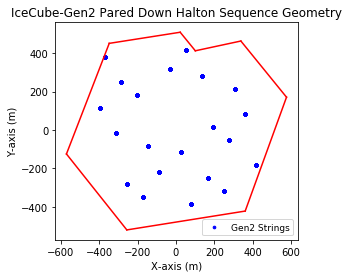

In [580]:
fig12 = plot_2d_icetop(x_hal,y_hal,"Halton Sequence")

In [581]:
fig12.savefig('aas_plots/final_halton_2d_pared.png')

In [128]:
x_hal_big, y_hal_big = halton_coords(2,180,2750)
print(x_hal_big)

coord_matrix
[[1.37500000e+03 9.16666667e+02 1.00000000e+00]
 [6.87500000e+02 1.83333333e+03 1.00000000e+00]
 [2.06250000e+03 3.05555556e+02 1.00000000e+00]
 [3.43750000e+02 1.22222222e+03 1.00000000e+00]
 [1.71875000e+03 2.13888889e+03 1.00000000e+00]
 [1.03125000e+03 6.11111111e+02 1.00000000e+00]
 [2.40625000e+03 1.52777778e+03 1.00000000e+00]
 [1.71875000e+02 2.44444444e+03 1.00000000e+00]
 [1.54687500e+03 1.01851852e+02 1.00000000e+00]
 [8.59375000e+02 1.01851852e+03 1.00000000e+00]
 [2.23437500e+03 1.93518519e+03 1.00000000e+00]
 [5.15625000e+02 4.07407407e+02 1.00000000e+00]
 [1.89062500e+03 1.32407407e+03 1.00000000e+00]
 [1.20312500e+03 2.24074074e+03 1.00000000e+00]
 [2.57812500e+03 7.12962963e+02 1.00000000e+00]
 [8.59375000e+01 1.62962963e+03 1.00000000e+00]
 [1.46093750e+03 2.54629630e+03 1.00000000e+00]
 [7.73437500e+02 2.03703704e+02 1.00000000e+00]
 [2.14843750e+03 1.12037037e+03 1.00000000e+00]
 [4.29687500e+02 2.03703704e+03 1.00000000e+00]
 [1.80468750e+03 5.09259259

In [129]:
#exclude out of bound strings
hal_x_red1 = np.concatenate((x_hal_big[1:2], x_hal_big[3:6], x_hal_big[7:8], x_hal_big[9:14], x_hal_big[15:18],
                             x_hal_big[19:20],x_hal_big[23:24],x_hal_big[25:26],x_hal_big[27:30],x_hal_big[31:38],
                             x_hal_big[39:42],x_hal_big[43:44],x_hal_big[47:48],x_hal_big[49:50],x_hal_big[51:54],
                             x_hal_big[55:56],x_hal_big[59:62],x_hal_big[63:69],x_hal_big[71:72],
                             x_hal_big[73:77],x_hal_big[79:80],x_hal_big[81:86],x_hal_big[87:90],
                             x_hal_big[91:92],x_hal_big[95:96],x_hal_big[97:98],x_hal_big[99:102],
                             x_hal_big[103:106],x_hal_big[107:110],x_hal_big[111:114],x_hal_big[115:116],
                             x_hal_big[119:120],x_hal_big[121:122],x_hal_big[123:125],x_hal_big[127:134],
                             x_hal_big[135:138],x_hal_big[139:140],x_hal_big[143:144],x_hal_big[145:146],
                             x_hal_big[147:152],x_hal_big[153:154],x_hal_big[157:158],x_hal_big[159:162],
                             x_hal_big[163:164],x_hal_big[167:168],x_hal_big[169:170],x_hal_big[171:174],
                             x_hal_big[175:]))

hal_y_red1 = np.concatenate((y_hal_big[1:2], y_hal_big[3:6], y_hal_big[7:8], y_hal_big[9:14], y_hal_big[15:18],
                             y_hal_big[19:20],y_hal_big[23:24],y_hal_big[25:26],y_hal_big[27:30],y_hal_big[31:38],
                             y_hal_big[39:42],y_hal_big[43:44],y_hal_big[47:48],y_hal_big[49:50],y_hal_big[51:54],
                             y_hal_big[55:56],y_hal_big[59:62],y_hal_big[63:69],y_hal_big[71:72],
                             y_hal_big[73:77],y_hal_big[79:80],y_hal_big[81:86],y_hal_big[87:90],
                             y_hal_big[91:92],y_hal_big[95:96],y_hal_big[97:98],y_hal_big[99:102],
                             y_hal_big[103:106],y_hal_big[107:110],y_hal_big[111:114],y_hal_big[115:116],
                             y_hal_big[119:120],y_hal_big[121:122],y_hal_big[123:125],y_hal_big[127:134],
                             y_hal_big[135:138],y_hal_big[139:140],y_hal_big[143:144],y_hal_big[145:146],
                             y_hal_big[147:152],y_hal_big[153:154],y_hal_big[157:158],y_hal_big[159:162],
                             y_hal_big[163:164],y_hal_big[167:168],y_hal_big[169:170],y_hal_big[171:174],
                             y_hal_big[175:]))
print(len(hal_y_red1))

113


In [151]:
#exclude out of bound strings part 2
hal_x_red2 = np.concatenate((hal_x_red1[:34], hal_x_red1[35:42], hal_x_red1[43:47], hal_x_red1[48:69], 
                             hal_x_red1[70:95],hal_x_red1[96:97],hal_x_red1[98:111],hal_x_red1[112:]))

hal_y_red2 = np.concatenate((hal_y_red1[:34], hal_y_red1[35:42], hal_y_red1[43:47], hal_y_red1[48:69], 
                             hal_y_red1[70:95],hal_y_red1[96:97],hal_y_red1[98:111],hal_y_red1[112:]))
print(len(hal_y_red2))

106


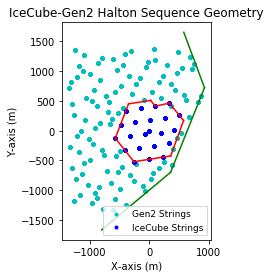

In [154]:
fig13= plot_2d_icetop_big(hal_x_red2,hal_y_red2,gen2_dom_x_positions[:,0:61],gen2_dom_y_positions[:,0:61], "Halton Sequence")

In [155]:
fig13.savefig('aas_plots/final_halton_2d_gen2.png')